In [1]:
# i used tmdb_movies.csv file and analysing it 

In [2]:
# i used pandas and matplotlib to answer those questions : 
#   which genres most popular year to year
#  which genres gets most revenue 
#and more in follwed cells

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1- import data

In [4]:
df = pd.read_csv("tmdb_movies.csv")

# 2-Data Wrangleing

#
# Data assesing
#

In [5]:
df.shape

(10866, 21)

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#  check columns data type 
# it seems that release_date column is a string not date time(must convert it)


In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<AxesSubplot:>

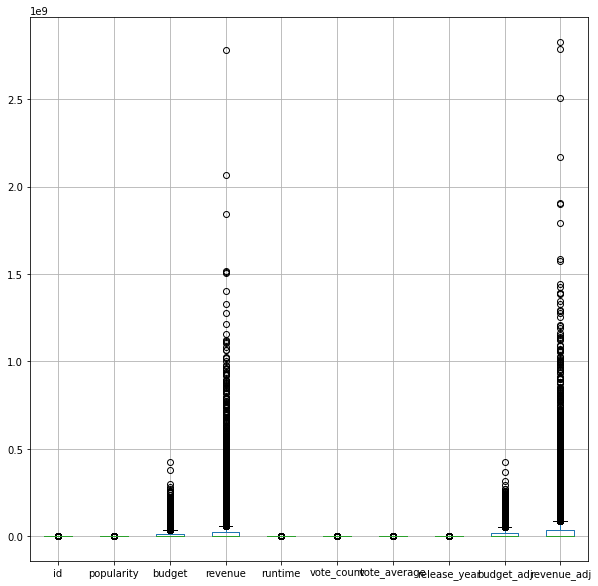

In [12]:
df.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

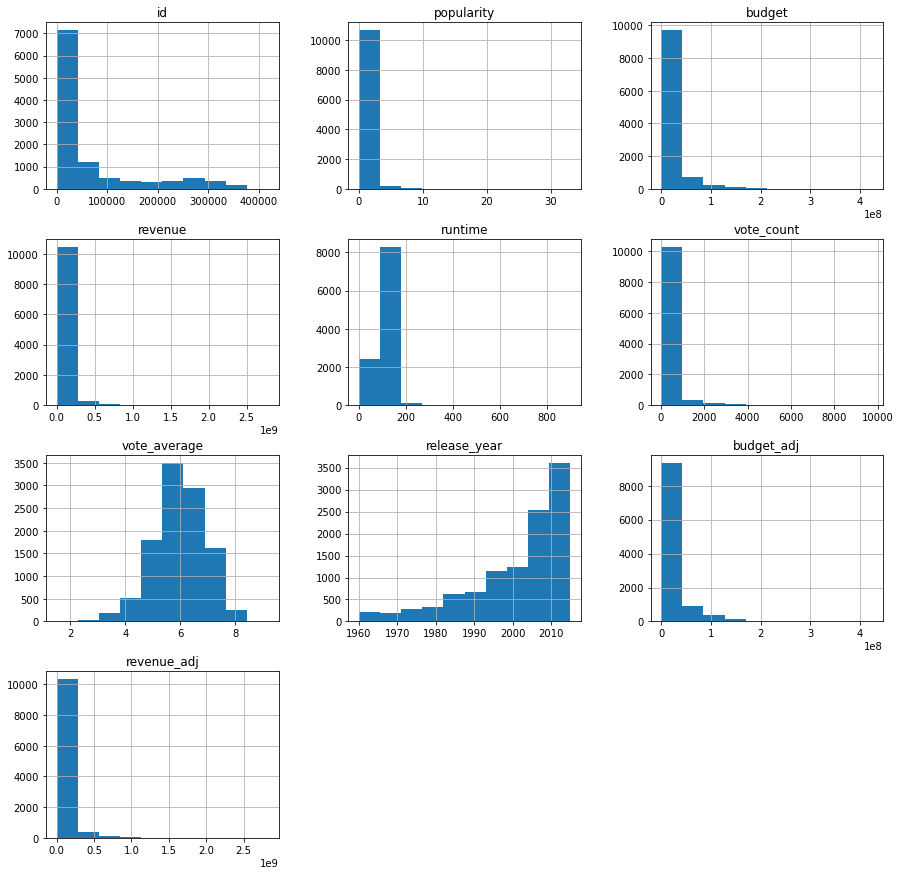

In [13]:
df.hist(figsize=(15,15))

In [14]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

# 1-remove dupicates

In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

# 2- transform release date column data type from string to date time

In [18]:
type(df["release_date"][0])

str

In [19]:
df["release_date"] = pd.to_datetime(df["release_date"])

In [20]:
type(df["release_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

# 3-drop (homepage,keywords,tagline) columns as it contains too much missing and i will need it in my analysis

In [21]:
df.drop("homepage",axis=1,inplace=True)

In [22]:
df["keywords"].value_counts()

woman director                                         134
independent film                                        82
sport                                                   25
suspense                                                24
duringcreditsstinger                                    24
                                                      ... 
sexuality|spacecraft|rocket|bikini|listening device      1
dystopia|spaceship|survival|mission                      1
magic|magic mirror|friendship|high school|pegasus        1
cuba|fidel castro|che guevara                            1
alien|found footage                                      1
Name: keywords, Length: 8804, dtype: int64

In [23]:
df["tagline"].value_counts()

Based on a true story.                                                       5
Be careful what you wish for.                                                3
Two Films. One Love.                                                         3
Free your mind.                                                              2
There are no clean getaways.                                                 2
                                                                            ..
It's happening so fast.                                                      1
You won't believe your eyes.                                                 1
Sometimes it's hard to be the odd one in.                                    1
The Boys are back in town... and they have competition.                      1
Can the most famous film star in the world fall for just an ordinary guy?    1
Name: tagline, Length: 7997, dtype: int64

In [24]:
df.drop("tagline",axis=1,inplace=True)

In [25]:
df.drop("keywords",axis=1,inplace=True)

# i thisk that i will not need overview,vote_count columns in my analysis ,
# i prefer to drop them to make my data more reliable 

In [26]:
df.drop("vote_count",axis=1,inplace=True)

In [27]:
df.drop("overview",axis=1,inplace=True)

In [28]:
df.shape

(10865, 16)

# 4-rename runtime column to attach minutes to be more understanding 

In [29]:
df.rename(columns={"runtime":"runtime_min"},inplace=True)

# #
#

# 
# Questions to ask
#

# Q2: which genres gets most revenue 

# Q3 : what is the highest budget movie all time 
# Q4 : what is the highest revenue movie all time

# Q5 : most popular and watched director(most favourite director to what his movies)

# Q6 : does movie with highest budget most favourited and watched????
# Q7: does as budget increases the revenue increases ????

# Q8 : highest budget production companies 

# transform budget and revenue columns from large numbers to small ones and change col name to be in dollars

In [30]:
df["budget"] = df["budget"] /1e6

In [31]:
df.rename(columns = {"budget":"budget_MM"},inplace=True)

In [32]:
df["revenue"] = df["revenue"] /1e6

In [33]:
df.rename(columns = {"revenue":"revenue_MM"},inplace=True)

In [34]:
df["budget_adj"] = df["budget_adj"] /1e6

In [35]:
df["revenue_adj"] = df["revenue_adj"] /1e6

In [36]:
df.rename(columns = {"budget_adj":"budget_adj_MM","revenue_adj":"revenue_adj"},inplace=True)

In [37]:
df.head(2)

,id,imdb_id,popularity,budget_MM,revenue_MM,original_title,cast,director,runtime_min,genres,production_companies,release_date,vote_average,release_year,budget_adj_MM,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137.999939,1392.445893
1,76341,tt1392190,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137.999939,348.161292


# 

# Univariate & Bivariate analysis

In [38]:
# Univaraite (single variables) : Categoriacal


# Top Ten movies genres of all time

In [39]:
#check any nulls and missing at genres columns that will affect on my analysis

df["genres"].isnull().sum()

23

In [40]:
df.dropna(axis=0,inplace=True)

In [41]:
df.shape

(9770, 16)

In [42]:
df["genres"].value_counts()

Drama                                            638
Comedy                                           615
Drama|Romance                                    272
Comedy|Drama                                     255
Comedy|Romance                                   248
                                                ... 
Action|Comedy|Family|Adventure                     1
Thriller|Comedy|Drama|Romance|Science Fiction      1
Adventure|Family|Science Fiction                   1
Comedy|Horror|Mystery                              1
Action|Adventure|Drama|Science Fiction             1
Name: genres, Length: 1916, dtype: int64

In [43]:
top_10_gen = df["genres"].value_counts()[0:10]

<AxesSubplot:title={'center':'Top ten movies genres'}>

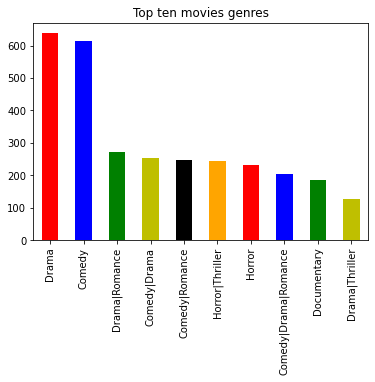

In [44]:
top_10_gen.plot(kind="bar",color=["r","b","g","y","black","orange"],title="Top ten movies genres")

In [45]:
# Top Movies produxtion companies of all time

<AxesSubplot:>

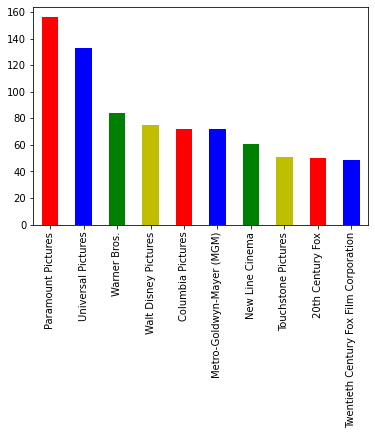

In [46]:
df["production_companies"].value_counts()[0:10].plot.bar(color=["r","b","g","y"])

# Univariate variables : numeric varibles

In [47]:
df.head(2)

,id,imdb_id,popularity,budget_MM,revenue_MM,original_title,cast,director,runtime_min,genres,production_companies,release_date,vote_average,release_year,budget_adj_MM,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137.999939,1392.445893
1,76341,tt1392190,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137.999939,348.161292


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

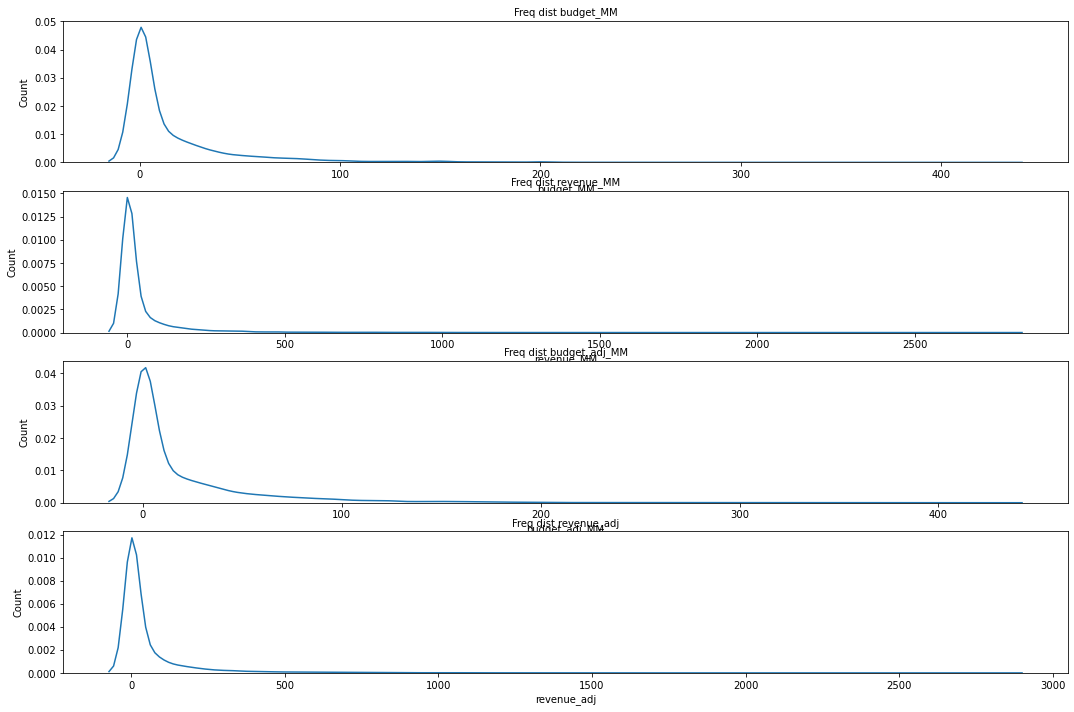

In [48]:

col_names = ["budget_MM","revenue_MM","budget_adj_MM","revenue_adj"]


fig , ax = plt.subplots(len(col_names), figsize=(18,12))

for i,col_val in enumerate(col_names):
    sns.distplot(df[col_val], hist=False, ax=ax[i]) # we can se hist = True also
    
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)
    
plt.show()

In [49]:
# all of our data is right skewed 

#
# Bi-variate Variables
#

In [50]:
#look out for scatter plots that follow a clear linear pattern 
#with an either increasing or decreasing slope so that we can draw conclusions

In [51]:
df.head(2)

,id,imdb_id,popularity,budget_MM,revenue_MM,original_title,cast,director,runtime_min,genres,production_companies,release_date,vote_average,release_year,budget_adj_MM,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137.999939,1392.445893
1,76341,tt1392190,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137.999939,348.161292


In [52]:
new_df = df.drop(["id","imdb_id","original_title","cast","director","genres","production_companies",
                 "release_date"],axis=1)


# correlation Matrix

In [53]:
new_df.corr()

,popularity,budget_MM,revenue_MM,runtime_min,vote_average,release_year,budget_adj_MM,revenue_adj
popularity,1.000000,0.538914,0.662402,0.156259,0.239169,0.110982,0.505370,0.606453
budget_MM,0.538914,1.000000,0.731195,0.214177,0.096137,0.138312,0.968313,0.616313
revenue_MM,0.662402,0.731195,1.000000,0.183225,0.192097,0.071788,0.702356,0.918030
runtime_min,0.156259,0.214177,0.183225,1.000000,0.194442,-0.133579,0.249020,0.198240
vote_average,0.239169,0.096137,0.192097,0.194442,1.000000,-0.140157,0.109883,0.214744
release_year,0.110982,0.138312,0.071788,-0.133579,-0.140157,1.000000,0.036174,-0.056260
budget_adj_MM,0.505370,0.968313,0.702356,0.249020,0.109883,0.036174,1.000000,0.640838
revenue_adj,0.606453,0.616313,0.918030,0.198240,0.214744,-0.056260,0.640838,1.000000


<AxesSubplot:>

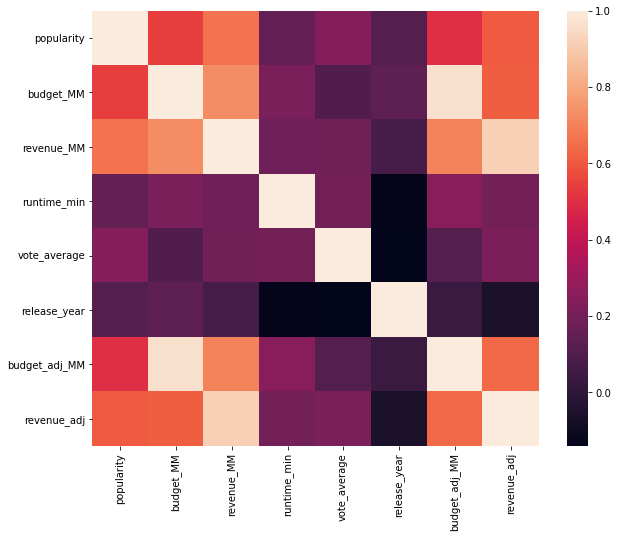

In [54]:
f, ax = plt.subplots(figsize=(10, 8))

corr = new_df.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [55]:
#Highly correlated variables will have correlation value close to +1 and 
#less correlated variables will have correlation value close to -1.

#there is a strong correlation between :
# revenue_MM and budget_MM 

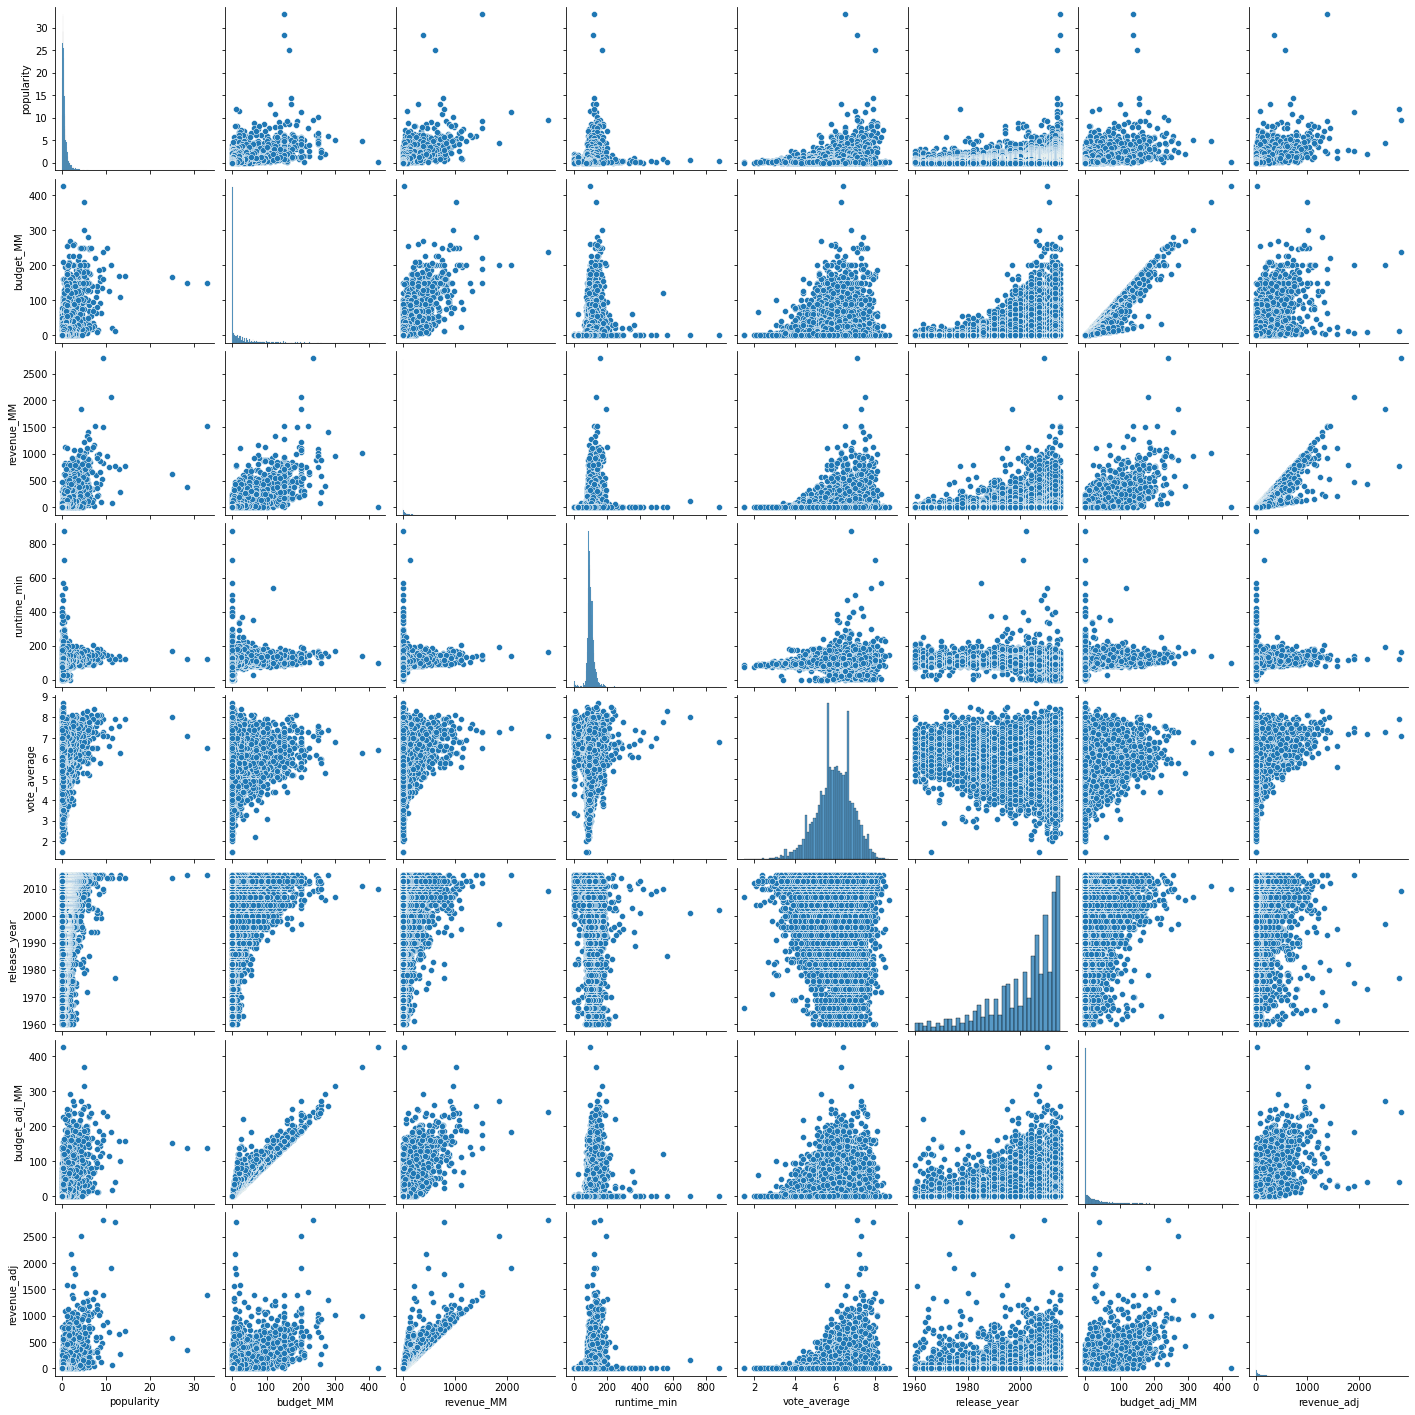

In [56]:
sns.pairplot(new_df)

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='budget_MM', ylabel='popularity'>,
        <AxesSubplot:xlabel='revenue_MM', ylabel='popularity'>,
        <AxesSubplot:xlabel='runtime_min', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_average', ylabel='popularity'>,
        <AxesSubplot:xlabel='release_year', ylabel='popularity'>,
        <AxesSubplot:xlabel='budget_adj_MM', ylabel='popularity'>,
        <AxesSubplot:xlabel='revenue_adj', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='budget_MM', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='revenue_MM', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='runtime_min', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='vote_average', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='release_year', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='budget_adj_MM', ylabel='budget_MM'>,
        <AxesSubplot:xlabel='re

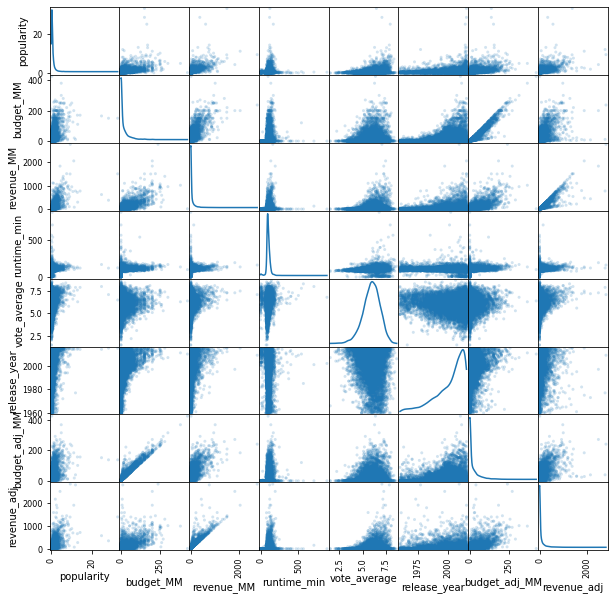

In [57]:
from pandas.plotting import scatter_matrix

scatter_matrix(new_df,alpha=0.2,figsize=(10,10),diagonal="kde")

# Check missing values

In [58]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget_MM               0
revenue_MM              0
original_title          0
cast                    0
director                0
runtime_min             0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj_MM           0
revenue_adj             0
dtype: int64

In [59]:
# no missing values to fill or drop

# check any outliers

In [60]:
df.head(3)

,id,imdb_id,popularity,budget_MM,revenue_MM,original_title,cast,director,runtime_min,genres,production_companies,release_date,vote_average,release_year,budget_adj_MM,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137.999939,1392.445893
1,76341,tt1392190,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137.999939,348.161292
2,262500,tt2908446,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,101.199955,271.619025


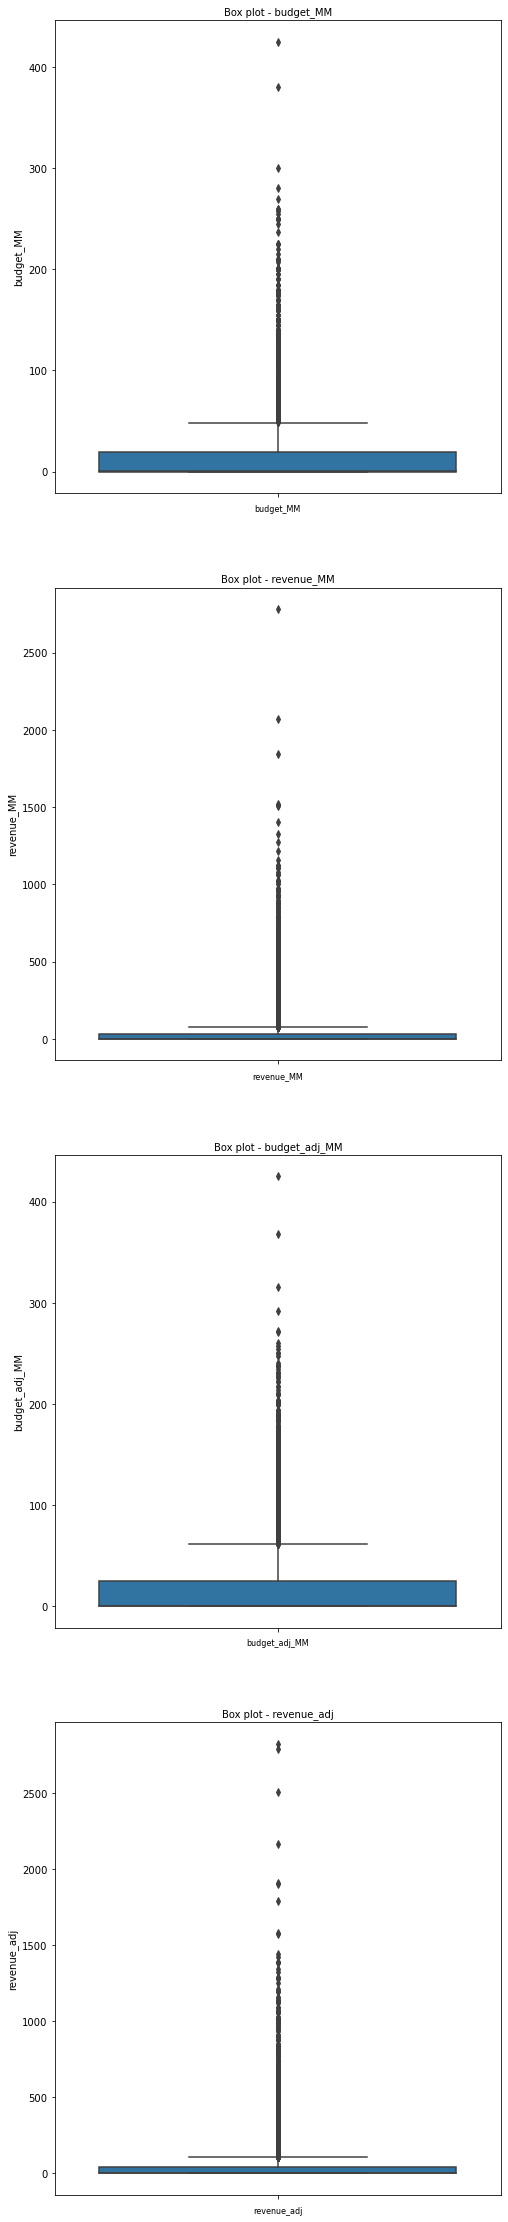

In [61]:
col_names = ['budget_MM','revenue_MM', 'budget_adj_MM', 'revenue_adj']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [62]:
# the black dots is outliers

In [63]:
df[col_names].describe()

,budget_MM,revenue_MM,budget_adj_MM,revenue_adj
count,9770.000000,9770.000000,9770.000000,9770.000000
mean,16.182980,44.240263,19.419965,57.064773
std,32.213203,122.599810,35.668906,151.463220
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.000000,0.317963,0.000000
75%,19.362500,31.057787,24.676461,43.128562
max,425.000000,2781.505847,425.000000,2827.123750


# Realtion between Revenue and Budget

In [64]:
df.head(1)

,id,imdb_id,popularity,budget_MM,revenue_MM,original_title,cast,director,runtime_min,genres,production_companies,release_date,vote_average,release_year,budget_adj_MM,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.52881,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137.999939,1392.445893


Text(0.5, 1.0, 'Relation between movies budget and revenue')

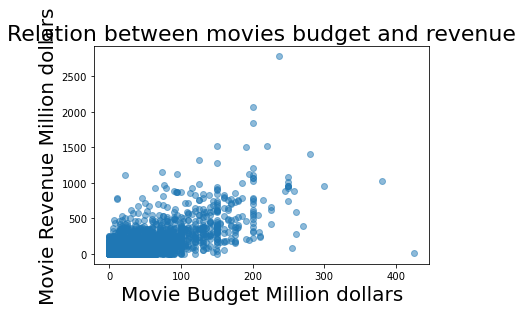

In [65]:
x = df["budget_MM"]
y= df["revenue_MM"]

plt.scatter(x,y,alpha=0.5)

plt.rcParams.update({"figure.figsize":(6,6)})

plt.xlabel("Movie Budget Million dollars",fontsize=20)
plt.ylabel("Movie Revenue Million dollars",fontsize=20)
plt.title("Relation between movies budget and revenue",fontsize=22)


In [66]:
# there are outliers in both columns and it's obviously appears in large values as dots get scattered from each other
#there is stringe relationship between movie budget and it's revenue

# Q1: most genres income and revenue 

In [67]:
df.pivot_table(index = "genres",values=["revenue_MM","budget_MM"])

,budget_MM,revenue_MM
genres,,
Action,23.60625,40.901324
Action|Adventure,24.75000,34.111053
Action|Adventure|Animation,0.00000,0.000000
Action|Adventure|Animation|Comedy|Drama,0.00000,16.627188
Action|Adventure|Animation|Comedy|Family,0.00000,0.000000
...,...,...
Western|Drama|Crime|Romance,0.00000,1.031243
Western|History,10.00000,15.795189
Western|History|War,145.00000,25.819961


In [68]:
genres_rev =   df.pivot_table(index = "genres",values=["revenue_MM"])
genres_rev

,revenue_MM
genres,
Action,40.901324
Action|Adventure,34.111053
Action|Adventure|Animation,0.000000
Action|Adventure|Animation|Comedy|Drama,16.627188
Action|Adventure|Animation|Comedy|Family,0.000000
...,...
Western|Drama|Crime|Romance,1.031243
Western|History,15.795189
Western|History|War,25.819961


In [69]:
#df.pivot_table(index = "genres",values=["revenue_MM$"]).plot(kind="bar")

# split most revenue genres to below one million and above one million 

In [70]:
low_genres_rev = genres_rev.query("revenue_MM < 1")
low_genres_rev

,revenue_MM
genres,
Action|Adventure|Animation,0.000000
Action|Adventure|Animation|Comedy|Family,0.000000
Action|Adventure|Animation|Drama|Family,0.000000
Action|Adventure|Animation|Family,0.000000
Action|Adventure|Animation|Family|Mystery,0.000000
...,...
Western|Comedy|Drama|Music,0.000000
Western|Drama,0.725259
Western|Drama|Comedy|Romance,0.000000


In [71]:
# sort values from max to min 
low_genres_rev.sort_values(by="revenue_MM",ascending=False)

,revenue_MM
genres,
Crime|Drama|Action|Thriller|Science Fiction,0.967000
Drama|Science Fiction|Romance,0.908000
Crime|Drama|Thriller|History,0.871279
Family|Animation|Fantasy,0.857522
Action|Adventure|Fantasy|Horror,0.801807
...,...
Comedy|Drama|Horror|Thriller,0.000000
Comedy|Drama|Mystery|Science Fiction,0.000000
Comedy|Drama|Romance|Science Fiction,0.000000


In [72]:
high_genres_rev = genres_rev.query("revenue_MM > 1")
high_genres_rev

,revenue_MM
genres,
Action,40.901324
Action|Adventure,34.111053
Action|Adventure|Animation|Comedy|Drama,16.627188
Action|Adventure|Animation|Family|Fantasy,277.493739
Action|Adventure|Animation|Family|Science Fiction,157.860523
...,...
Western|Animation|Family|Comedy|Music,103.951461
Western|Drama|Adventure|Thriller,532.950503
Western|Drama|Crime|Romance,1.031243


In [73]:
# sort values from max to min 

high_genres_rev.sort_values(by="revenue_MM",ascending=False)

,revenue_MM
genres,
Crime|Drama|Mystery|Thriller|Action,1106.279658
Action|Adventure|Science Fiction|Fantasy,1034.089113
Family|Fantasy|Adventure,1025.467110
Adventure|Fantasy|Family|Mystery,938.212738
Science Fiction|Thriller|Action|Adventure,847.423452
...,...
Crime|Drama|Thriller|Mystery,1.083931
Mystery|Drama|Thriller,1.063022
Science Fiction|Comedy|Horror,1.047186


In [74]:
#high_genres_rev.reset_index(inplace=True)

In [75]:
high_genres_rev

,revenue_MM
genres,
Action,40.901324
Action|Adventure,34.111053
Action|Adventure|Animation|Comedy|Drama,16.627188
Action|Adventure|Animation|Family|Fantasy,277.493739
Action|Adventure|Animation|Family|Science Fiction,157.860523
...,...
Western|Animation|Family|Comedy|Music,103.951461
Western|Drama|Adventure|Thriller,532.950503
Western|Drama|Crime|Romance,1.031243


In [76]:
high_genres_rev[high_genres_rev["revenue_MM"]>=100]

,revenue_MM
genres,
Action|Adventure|Animation|Family|Fantasy,277.493739
Action|Adventure|Animation|Family|Science Fiction,157.860523
Action|Adventure|Comedy|Crime|Thriller,148.903014
Action|Adventure|Comedy|Drama|Mystery,119.269486
Action|Adventure|Comedy|Drama|Science Fiction,111.239712
...,...
War|Drama|History|Action,154.984035
War|History|Action|Adventure|Drama,167.298192
Western|Animation|Adventure|Comedy|Family,122.563539


In [77]:
top_10 = high_genres_rev[high_genres_rev["revenue_MM"]>=100][0:10]
top_10

,revenue_MM
genres,
Action|Adventure|Animation|Family|Fantasy,277.493739
Action|Adventure|Animation|Family|Science Fiction,157.860523
Action|Adventure|Comedy|Crime|Thriller,148.903014
Action|Adventure|Comedy|Drama|Mystery,119.269486
Action|Adventure|Comedy|Drama|Science Fiction,111.239712
Action|Adventure|Comedy|Family|Fantasy,150.691130
Action|Adventure|Comedy|Family|Science Fiction,197.011982
Action|Adventure|Comedy|Science Fiction,238.521284
Action|Adventure|Crime,151.614059


In [85]:
top_10.index[0:10]

Index(['Action|Adventure|Animation|Family|Fantasy',
       'Action|Adventure|Animation|Family|Science Fiction',
       'Action|Adventure|Comedy|Crime|Thriller',
       'Action|Adventure|Comedy|Drama|Mystery',
       'Action|Adventure|Comedy|Drama|Science Fiction',
       'Action|Adventure|Comedy|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Science Fiction',
       'Action|Adventure|Comedy|Science Fiction', 'Action|Adventure|Crime',
       'Action|Adventure|Drama|Fantasy|Horror'],
      dtype='object', name='genres')

In [86]:
x = top_10.index[0:10]
y = top_10["revenue_MM"]

#top_10.plot(kind="bar")
#plt.bar(x,y)
#plt.xlabel("Movie Genres",fontsize=16,color="b")
#plt.ylabel("Revenue MM$",fontsize=16,color="y")
#plt.title("Top 10 Genres Movies Revenue of all time",fontsize=20,color="r")
#plt.tight_layout()

Text(0.5, 1.0, 'Top 10 Genres Movies Revenue of all time')

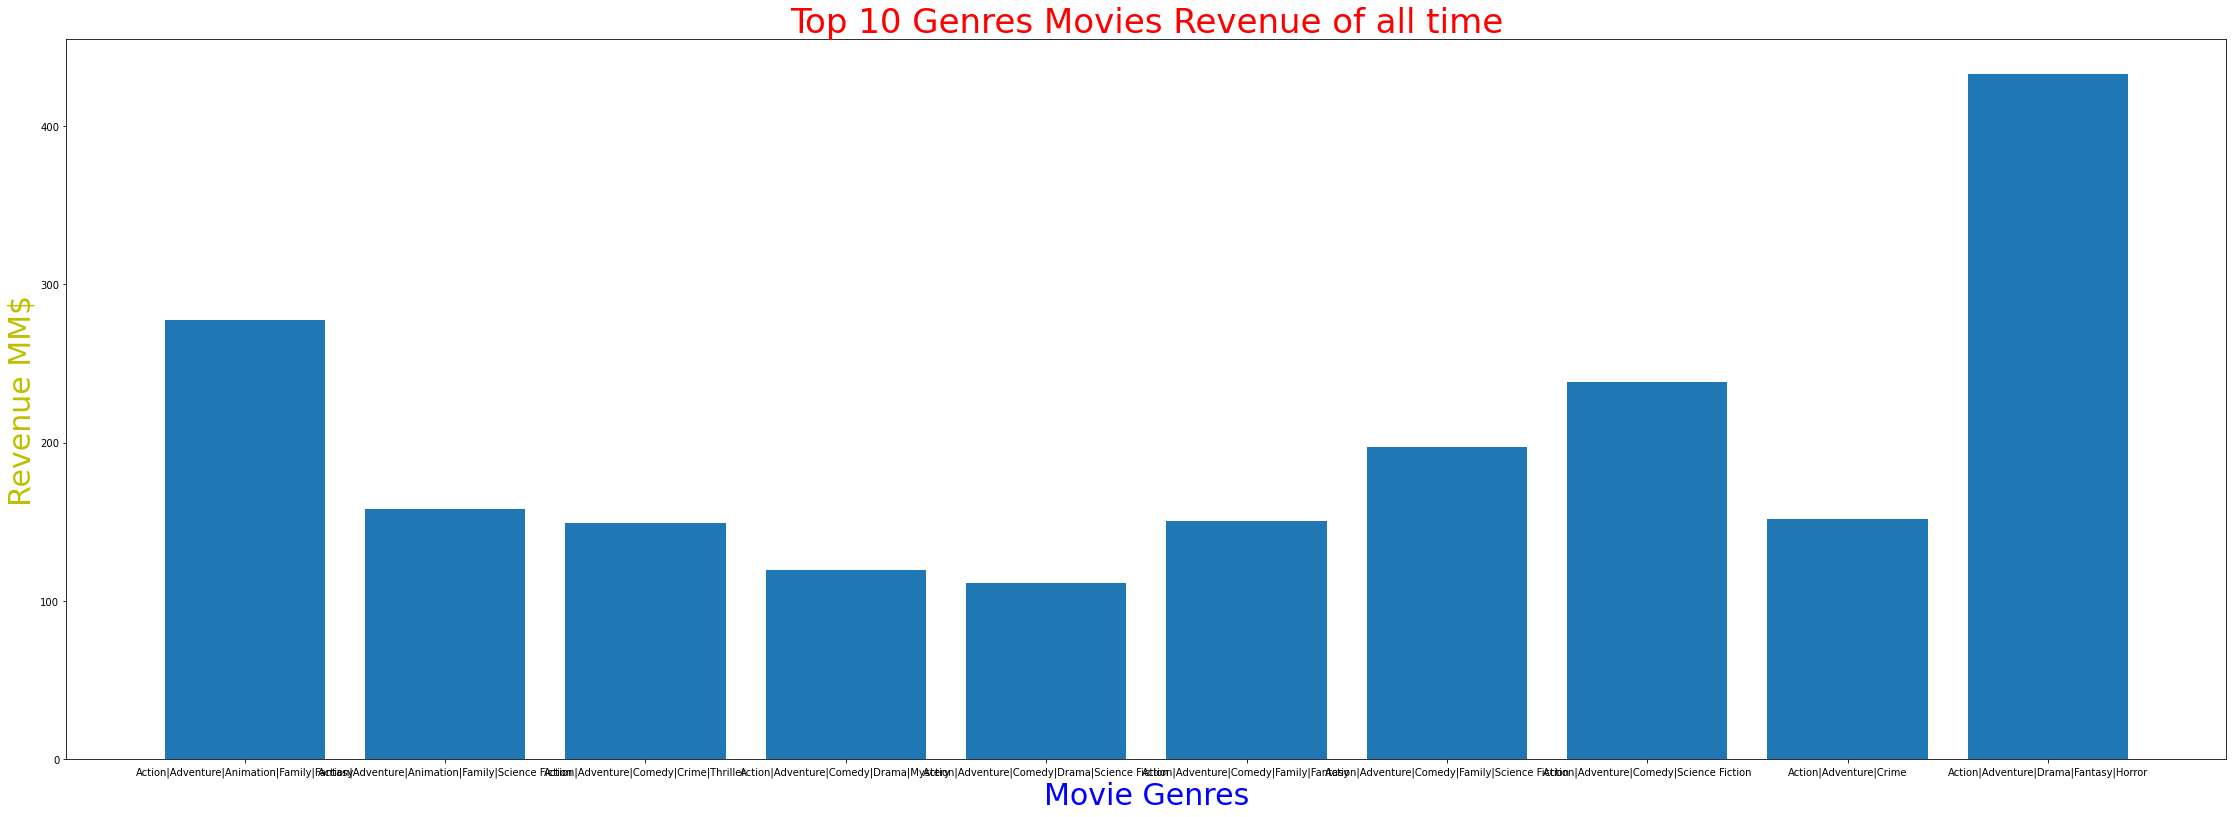

In [87]:
fig = plt.figure(figsize=(30,10))

ax = fig.add_axes([0,0,1,1])

#ax.plot(x,y)
plt.bar(x,y)
#fig.tight_layout()

ax.set_xlabel("Movie Genres",fontsize=30,color="b")
ax.set_ylabel("Revenue MM$",fontsize=30,color="y")
ax.set_title("Top 10 Genres Movies Revenue of all time",fontsize=34,color="r")

#idont know how to bold up each of x axis font, i wish you to help me

# it seems that Action,Drama,Advanture movies are the highest revenue 

# Q: highest budget movies(take too much money to make, hard to record )

In [88]:
df.head(3)

,id,imdb_id,popularity,budget_MM,revenue_MM,original_title,cast,director,runtime_min,genres,production_companies,release_date,vote_average,release_year,budget_adj_MM,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137.999939,1392.445893
1,76341,tt1392190,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137.999939,348.161292
2,262500,tt2908446,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,101.199955,271.619025


In [89]:
genres_bud = df.pivot_table(index = "genres",values= "budget_MM")
genres_bud

,budget_MM
genres,
Action,23.60625
Action|Adventure,24.75000
Action|Adventure|Animation,0.00000
Action|Adventure|Animation|Comedy|Drama,0.00000
Action|Adventure|Animation|Comedy|Family,0.00000
...,...
Western|Drama|Crime|Romance,0.00000
Western|History,10.00000
Western|History|War,145.00000


In [ ]:
#genres_bud.reset_index(inplace = True)

In [90]:
genres_bud.sort_values(by = "budget_MM",ascending = False,inplace=True)

In [91]:
genres_bud

,budget_MM
genres,
Adventure|Fantasy|Action|Western|Thriller,425.0
Thriller|Action|Adventure|Science Fiction,209.0
Family|Fantasy|Adventure,200.0
Adventure|Action|Fantasy,198.0
Action|Family|Science Fiction|Adventure|Mystery,190.0
...,...
Drama|History|Western,0.0
Adventure|Documentary,0.0
Horror|Drama|Thriller|Crime,0.0


# it seems that Advanture and Action movies use too much money to record

# Q : highest production companies budget and revenue 

In [92]:
prod_comp = df.pivot_table(index="production_companies",values=["budget_MM","revenue_MM"])
prod_comp

,budget_MM,revenue_MM
production_companies,,
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures,0.000000,0.000000
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions,4.500000,0.123820
120dB Films|Louisiana Media Productions|Anchor Bay Films|Mimran Schur Pictures|Upload Films,5.000000,0.000000
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative,3.500000,0.000000
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,0.000001,0.001378
...,...,...
thinkfilm|Starz Entertainment|Candy Heart Productions,0.000000,0.000000
uFilm|Informant Media|Entertainment Motion Pictures|Umedia|uFund,12.000000,0.000000
uFilm|Le Tax Shelter du Gouvernement FÃ©dÃ©ral de Belgique|Entertainment Motion Pictures|Umedia|HCC Media Group,8.000000,0.000000


In [93]:
high_bud_prod_comp  = prod_comp.sort_values(ascending=False,by="budget_MM")
high_bud_prod_comp

,budget_MM,revenue_MM
production_companies,,
Boram Entertainment Inc.,425.0,11.087569
Walt Disney Pictures|Jerry Bruckheimer Films|Moving Picture Company (MPC),380.0,1021.683000
Marvel Studios|Prime Focus|Revolution Sun Studios,280.0,1405.035767
DC Comics|Legendary Pictures|Warner Bros.|Bad Hat Harry Productions,270.0,391.081192
Columbia Pictures|Laura Ziskin Productions|Marvel Enterprises,258.0,890.871626
...,...,...
Killer Films|Foundry Films|Pacific Northwest Pictures,0.0,0.000000
Killer Films|Braven Films|Rip Cord Productions,0.0,0.000000
Killer Films|Big Indie Pictures|A+E Studios,0.0,0.000000


In [94]:
high_rev_prod_comp =prod_comp.sort_values(ascending=False,by="revenue_MM")
high_rev_prod_comp

,budget_MM,revenue_MM
production_companies,,
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment,237.0,2781.505847
Lucasfilm|Truenorth Productions|Bad Robot,200.0,2068.178225
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment,200.0,1845.034188
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,150.0,1513.528810
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,190.0,1506.249360
...,...,...
Ital-Noleggio Cinematografico|Lotar Film Productions,0.0,0.000000
Isle of Man Film|UK Film Council|Screen Yorkshire|Steel Mill Pictures,0.0,0.000000
Isle of Man Film|HanWay Films|Magic Light Pictures|CinemaNX|TelevisiÃ³ de Catalunya TV3,0.0,0.000000


# it seems that not usually high budget company makes high revenue from movies

# most popular and high vote movies

In [95]:
df.pivot_table(index="genres",values="vote_average").sort_values(by="vote_average",ascending=False)

,vote_average
genres,
History|Drama|Thriller|War,8.0
Fantasy|Drama|Crime,8.0
Mystery|Documentary|Crime,8.0
Family|Animation|Fantasy,8.0
Romance|Comedy|Animation|Drama|Family,8.0
...,...
TV Movie|Science Fiction,3.3
Horror|Action|Science Fiction|Thriller,3.3
Adventure|Comedy|Family|Science Fiction|TV Movie,3.2


In [96]:
df.pivot_table(index="genres",values="popularity").sort_values(by="popularity",ascending=False)

,popularity
genres,
Adventure|Science Fiction|Thriller,13.112507
Adventure|Drama|Science Fiction,12.699699
Science Fiction|Adventure|Thriller,10.739009
Action|Thriller|Science Fiction|Mystery|Adventure,9.363643
Western|Drama|Adventure|Thriller,9.110700
...,...
Drama|Documentary|Foreign,0.011771
Horror|Mystery|Thriller|Crime,0.002381
Drama|Thriller|Science Fiction|Romance|Foreign,0.001983


# most popular movies is Adventure movies

# # highest movie budget 

In [97]:
df.pivot_table(index="original_title",values="budget_MM").sort_values(by="budget_MM",ascending=False)

,budget_MM
original_title,
The Warrior's Way,425.0
Pirates of the Caribbean: On Stranger Tides,380.0
Pirates of the Caribbean: At World's End,300.0
Avengers: Age of Ultron,280.0
Superman Returns,270.0
...,...
Land Ho!,0.0
Lake Placid: The Final Chapter,0.0
Lake Mungo,0.0


# highest movie revenue 

In [98]:
rev_mov = df.pivot_table(index="original_title",values="revenue_MM").sort_values(by="revenue_MM",ascending=False)
rev_mov

,revenue_MM
original_title,
Avatar,2781.505847
Star Wars: The Force Awakens,2068.178225
Jurassic World,1513.528810
Furious 7,1506.249360
Avengers: Age of Ultron,1405.035767
...,...
Korengal,0.000000
Kontroll,0.000000
Kongen av BastÃ¸y,0.000000


In [99]:
top_10_mov = rev_mov[0:10]
top_10_mov

,revenue_MM
original_title,
Avatar,2781.505847
Star Wars: The Force Awakens,2068.178225
Jurassic World,1513.528810
Furious 7,1506.249360
Avengers: Age of Ultron,1405.035767
Harry Potter and the Deathly Hallows: Part 2,1327.817822
Iron Man 3,1215.439994
Minions,1156.730962
Transformers: Dark of the Moon,1123.746996


In [100]:
top_10_mov.reset_index(inplace=True)
top_10_mov

,original_title,revenue_MM
0,Avatar,2781.505847
1,Star Wars: The Force Awakens,2068.178225
2,Jurassic World,1513.528810
3,Furious 7,1506.249360
4,Avengers: Age of Ultron,1405.035767
5,Harry Potter and the Deathly Hallows: Part 2,1327.817822
6,Iron Man 3,1215.439994
7,Minions,1156.730962
8,Transformers: Dark of the Moon,1123.746996
9,The Lord of the Rings: The Return of the King,1118.888979


Text(0.5, 1.0, 'Top 10 movies revenue of all time')

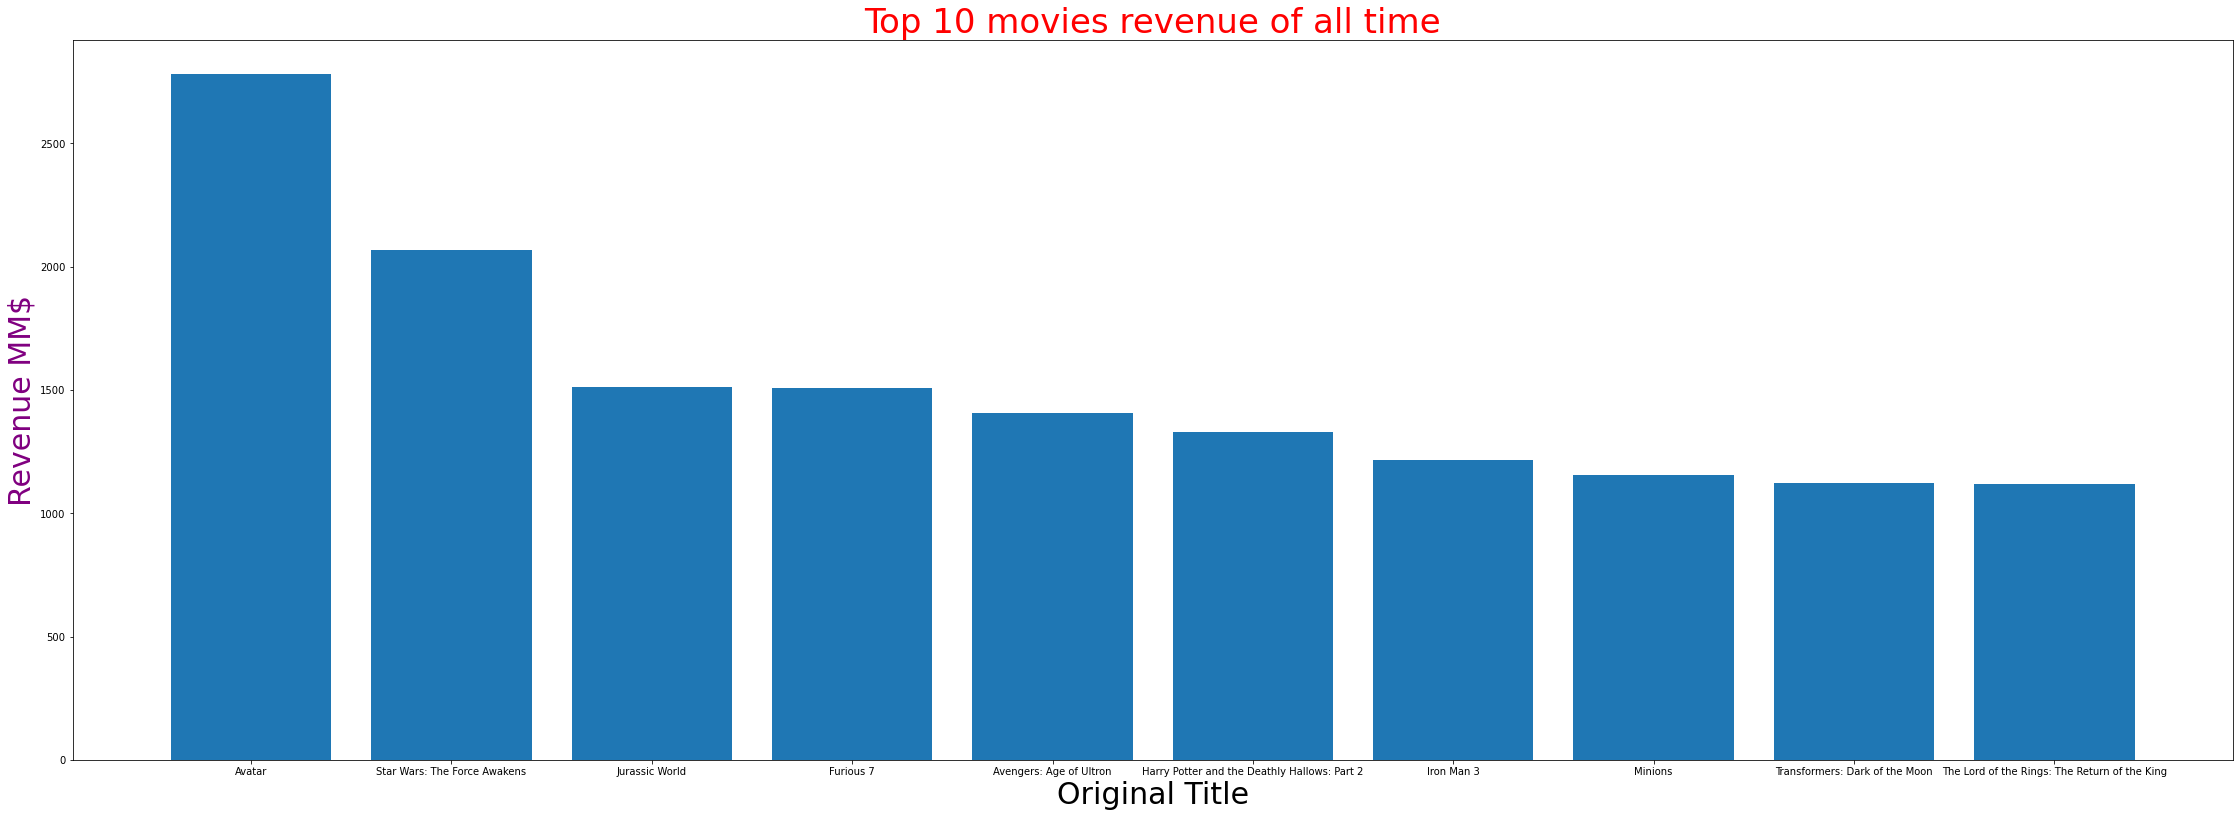

In [101]:
x = top_10_mov["original_title"]
y = top_10_mov["revenue_MM"]


fig = plt.figure(figsize=(30,10))

ax = fig.add_axes([0,0,1,1])

#ax.plot(x,y)
plt.bar(x,y)
#fig.tight_layout()

ax.set_xlabel("Original Title",fontsize=30,color="black")
ax.set_ylabel("Revenue MM$",fontsize=30,color="purple")
ax.set_title("Top 10 movies revenue of all time",fontsize=34,color="r")

#idont know how to bold up each of x axis font, i wish you to help me